In [6]:
import numpy as np
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme='onedork', figsize=(16, 9))

In [7]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

# Trend and Seasonality

In [8]:
def trend(time, slope=0):
    return slope * time

Let's create a time series that just trends upwards

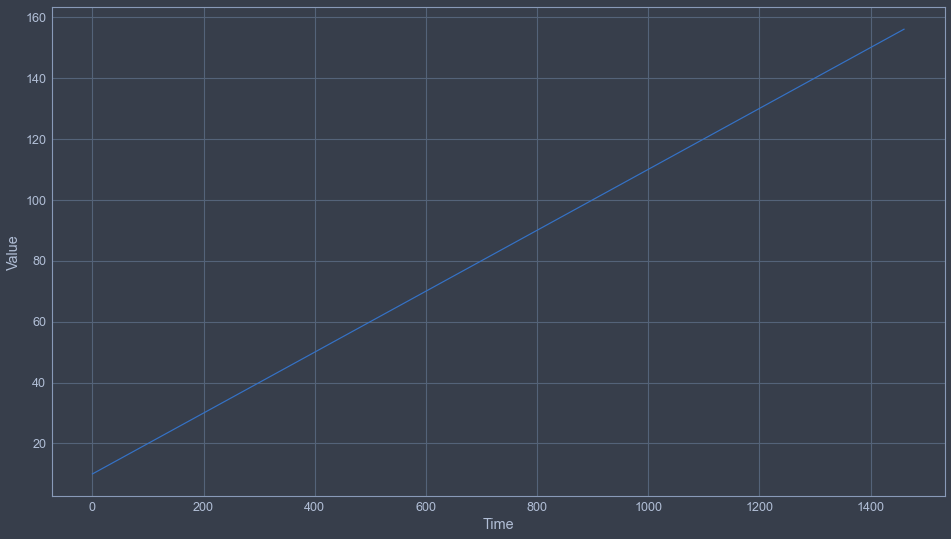

In [9]:
time = np.arange(4 * 365 + 1)
baseline = 10
series = baseline + trend(time, 0.1)

plt.figure(figsize=(16, 9))
plot_series(time, series)
plt.show()

In [10]:
time

array([   0,    1,    2, ..., 1458, 1459, 1460])

In [11]:
series

array([ 10. ,  10.1,  10.2, ..., 155.8, 155.9, 156. ])

In [12]:
def seasonal_pattern(season_time):
    """Just an arbitrary pattern"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period / period)
    return amplitude * seasonal_pattern(season_time)

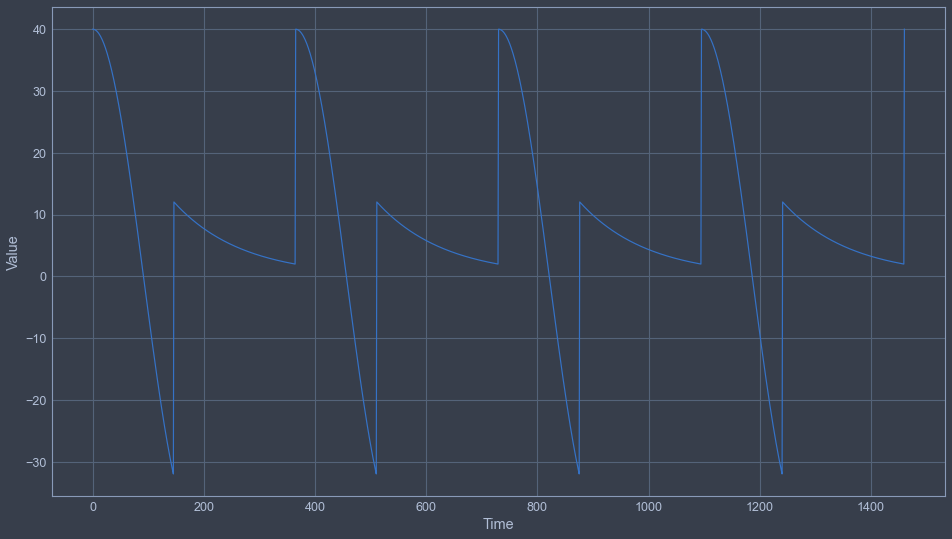

In [13]:
amplitude = 40
series = seasonality(time, period=365, amplitude=amplitude)

plt.figure(figsize=(16, 9))
plot_series(time, series)
plt.show()